# 第21讲 数组数据可视化(一)


图类型：杆图，直方图，散点图，曲线

5步画图法：

1. 导入模块
2. 准备数据
3. 选择函数
4. 修饰效果
5. 推送到屏

## 图像数据的导入与写出

图像数据是2D（灰度图）或3D数据(RGB图、RGBA图)。可以用 
```
         data= pyplot.imread('图像文件存放路径及名称')
```
         
导入内存并存入数组变量data中。

调用pyplot.imshow(data)命令可以显示图像于屏幕上。利用对数组的各种操作，就可以实现对图像的各种处理。

对于当前内存中的图像，可以调用
         pyplot.savefig('文件主名',**dc) 
         
写出到磁盘文件，其中
```
dc=dict(dpi=20,quality=0.6,optimize=True,format='jpg')
```
         
决定文件的数据格式、分辨率等。格式可以是jpg,png,pdf,bmp,svg等。

## 火柴棍图或杆图

函数：matplotlib.pyplot.stem(x,y, linefmt=None, markerfmt=None, basefmt=None)

主要参数：
* x: 棉棒的x轴基线的取值范围
* y: 棉棒的长度
* linefmt: 棉棒的样式，可选择{'-','--',':','-.'}，根据实际需求来选择
* markerfmt: 棉棒末端的样式
* basefmt: 指定基线的样式
* label: 图例显示内容


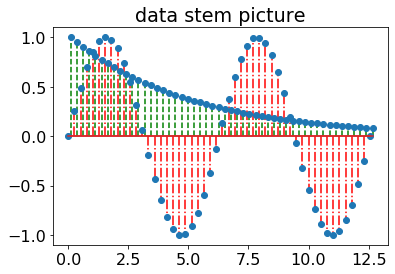

In [40]:
from matplotlib import pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
# 生成模拟数据集
x=plt.np.linspace(0,12.57,50);
y=plt.np.sin(x);
y2=plt.np.exp(-x/5)

# 绘制棉棒图
plt.stem(x,    y,   'r-.',      use_line_collection=True);
plt.stem(x+0.1,y2,  'g--',      use_line_collection=True);

#markerline, stemlines, baseline = plt.stem(x,y,linefmt='-',markerfmt='o',basefmt='--',label='TestStem')
# 可单独设置棉棒末端，棉棒连线以及基线的属性
#plt.setp(markerline, color='k')#将棉棒末端设置为黑色

plt.title('data stem picture');
#plt.legend()
plt.show()

## 台阶状折线图

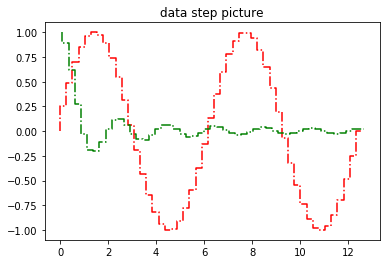

In [4]:
from matplotlib import pyplot as plt
x=plt.np.linspace(0,12.57,50);
y=plt.np.sin(x);
y2=plt.np.sinc(x)
plt.step(x,y,'r-.');
plt.step(x+0.1,y2,'g-.');
plt.title('data step picture');
plt.show()

## 直方图

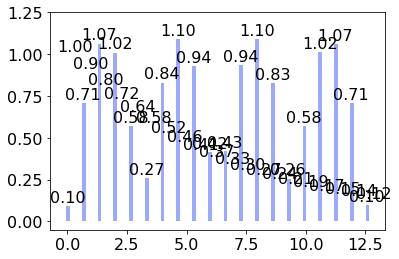

In [6]:
from matplotlib import pyplot as plt
npp=plt.np;pb=plt.bar;pt=plt.text
x=npp.linspace(0,12.57,20)
y1=0.1+abs(npp.sin(x));
y2=npp.exp(-x/6);
wd=0.2;xd=0.3 #wd是直方图宽度
c='#99aaff','#99af55','white' #颜色描述的两种方式
ps=dict(ha='center',va='bottom')#直方图文字位置
plt.rcParams['font.size']=16 #图中文字大小
pb(x,y1,wd,facecolor=c[0],edgecolor=c[2]);#画直方图pb(x+xd,y2,wd,facecolor=c[1],edgecolor=c[2]);
#  在每一直方块顶端显示数据值
for a,b in zip(x,y1):pt(a,b, '%.2f'%b,**ps)
for a,b in zip(x,y2):pt(a+xd,b,'%.2f'%b,**ps)
plt.ylim(-0.05, +1.25);
plt.show()

## 饼   图

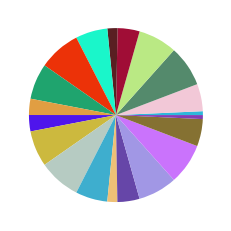

In [7]:
from matplotlib import pyplot as plt
npp=plt.np;ppe=plt.pie
x=npp.linspace(0,12.57,20)
y=0.1+abs(npp.sin(x));
c=npp.random.random((len(x),3))
ppe(y,colors=c);#画饼图plt.show()

## 散点图

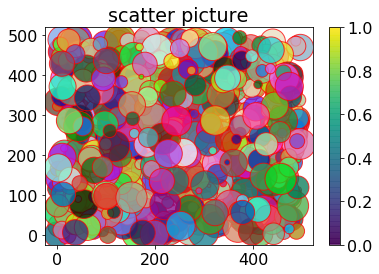

In [28]:
from matplotlib import pyplot as plt;
nr=plt.np.random.random;
n=800
x,y=nr((2,n))*500 # n个坐标点位置
s=nr(n)*1000     # n个marker的大小
c=nr((800,3)) # n个marker的颜色
plt.scatter(x,y,s,color=c,marker='o',alpha=0.75,edgecolor='red')
plt.title('scatter picture')
plt.colorbar()
plt.show()
# x,y给出marker的坐标，s给出对应大小
# color给出颜色,edgeclor给出边色
# alpha给出不透明度，marker 给出形状


## 有序无序折线图


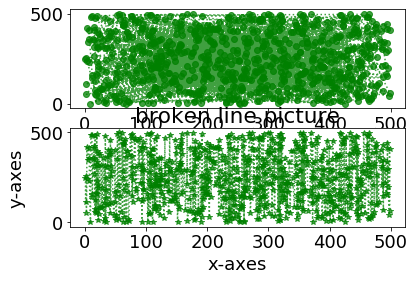

In [31]:
from matplotlib import pyplot as plt
nr=plt.np.random.random
n=800
x,y=nr((2,n))*500  # n个坐标点位置
flg=x.argsort();
xs=x[flg];ys=y[flg]
plt.rcParams['font.size']=18
plt.subplot(211);
plt.plot(x,y,'g:',marker='o',alpha=0.75)#自变量无序折线图
plt.subplot(212);
plt.plot(xs,ys,'g:',marker='*',alpha=0.75)#自变量有序折线图
plt.title('broken line picture')
plt.xlabel('x-axes')
plt.ylabel('y-axes')
plt.show()

## 无序折线图应用——画等边多边形

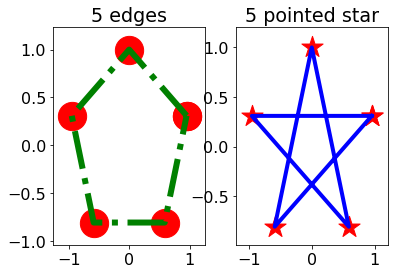

In [33]:
# encoding=gb2312
from matplotlib import pyplot as plt; npp=plt.np
n=5
if n>4:m=2
alpha0=npp.pi/(2*n)
k=npp.arange(n+1);
nk=k*2*npp.pi/n
x1=npp.cos(nk+alpha0);
y1=npp.sin(nk+alpha0)
x2=npp.cos(m*nk+alpha0);
y2=npp.sin(m*nk+alpha0)
plt.rcParams['font.size']=16
plt.subplot(121);
plt.plot(x1,y1,'g-.',lw=6);
plt.scatter(x1,y1,800,color='red',marker='o',facecolor='red')
plt.title(npp.str(n)+' edges')
plt.subplot(122);
plt.plot(x2,y2,'b-',lw=4);
plt.scatter(x2,y2,500,color='red',marker='*')
plt.title(npp.str(n)+' pointed star')
plt.show()


## 有序多折线图同窗的应用——贝塞尔函数曲线


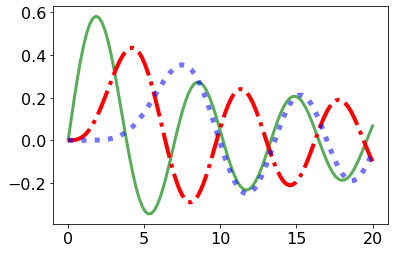

In [34]:
from scipy import special as sp;bj=sp.jn;
from matplotlib import pyplot as plt;
npp=plt.np;
pp=plt.plot
x=npp.linspace(0,20,100);
y1=bj(1,x);
y2=bj(3,x);
y3=bj(6,x)
plt.rcParams['font.size']=16
pp(x,y1,'g',lw=3,alpha=0.65);
pp(x,y2,'r-.',lw=4);
pp(x,y3,'b:',lw=5,alpha=0.55);
plt.show()